# TripAdvisor restaurants info for 31 European cities

### Sentiment analysis: In this dataset, based on the customer reviews the ratings of the restaurants are predicted. Each class of rating is associated to a sentiment. Using Natural Language Processing, the raw text data is preprocessed and a vector of stemmed words is assigned as the input to the model for training. The classifier model predicts the rating or the sentiment. 

In [1]:
# Importing packages for training 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
# Loading and understanding the dataset
data = pd.read_csv("TA_restaurants_curated.csv")

In [3]:
data

Unnamed: 0                                            Name       City  \
0                0                      Martine of Martine's Table  Amsterdam   
1                1                             De Silveren Spiegel  Amsterdam   
2                2                                         La Rive  Amsterdam   
3                3                                        Vinkeles  Amsterdam   
4                4                       Librije's Zusje Amsterdam  Amsterdam   
5                5                            Ciel Bleu Restaurant  Amsterdam   
6                6                                          Zaza's  Amsterdam   
7                7  Blue Pepper Restaurant And Candlelight Cruises  Amsterdam   
8                8                   Teppanyaki Restaurant Sazanka  Amsterdam   
9                9                         Rob Wigboldus Vishandel  Amsterdam   
10              10                                  The Happy Bull  Amsterdam   
11              11                                         Gartine  Amsterdam   
12              12                                 Restaurant Adam  Amsterdam   
13              13                                 Biercafe Gollem  Amsterdam   
14              14                              Restaurant Daalder  Amsterdam   
15              15                        Greenwoods Keizersgracht  Amsterdam   
16              16                           Omelegg - City Centre  Amsterdam   
17              17                             Brasserie Ambassade  Amsterdam   
18              18                               Sherpa Restaurant  Amsterdam   
19              19                         La Maschera Lillotatini  Amsterdam   
20              20                               Senses Restaurant  Amsterdam   
21              21                                   MOS Amsterdam  Amsterdam   
22              22                              Restaurant Vlaming  Amsterdam   
23              23                       Arendsnest Dutch Beer Bar  Amsterdam   
24              24                                         Jacketz  Amsterdam   
25              25                               Greenwoods Singel  Amsterdam   
26              26                                        Bord'Eau  Amsterdam   
27              27                               Omelegg - De Pijp  Amsterdam   
28              28                                         Harmsen  Amsterdam   
29              29                                  Brasserie SenT  Amsterdam   
...            ...                                             ...        ...   
125497        1637                                      Bar Tifosi     Zurich   
125498        1638                                 CS clube-social     Zurich   
125499        1639                                  Knezevic Marko     Zurich   
125500        1640                                            Frau     Zurich   
125501        1641                                      Bali Bagus     Zurich   
125502        1642                                     Don Hidalgo     Zurich   
125503        1643                             First Base Afrofood     Zurich   
125504        1644                              Kramer Gastronomie     Zurich   
125505        1645                                       RomanTino     Zurich   
125506        1646                                         Laduree     Zurich   
125507        1647                                        Wild Bar     Zurich   
125508        1648                   Rex Musenhof Bar & Biergarten     Zurich   
125509        1649                                   Testoni Pizza     Zurich   
125510        1650                 Marche Express Bahnhof Oerlikon     Zurich   
125511        1651                                     Club Narjil     Zurich   
125512        1652                                         Namamen     Zurich   
125513        1653                            Restaurant Piccolino     Zurich   
125514        1654                    G

In [4]:
data.describe()

Unnamed: 0        Ranking         Rating  Number of Reviews
count  125527.000000  115876.000000  115897.000000      108183.000000
mean     3974.686131    3657.463979       3.987441         125.184983
std      4057.687698    3706.255301       0.678814         310.833311
min         0.000000       1.000000      -1.000000           2.000000
25%      1042.000000     965.000000       3.500000           9.000000
50%      2445.000000    2256.000000       4.000000          32.000000
75%      5626.000000    5237.000000       4.500000         114.000000
max     18211.000000   16444.000000       5.000000       16478.000000

In [5]:
restaurant_data = data[['Rating', 'Reviews']]
restaurant_data

Rating                                            Reviews
0          5.0  [['Just like home', 'A Warm Welcome to Wintry ...
1          4.5  [['Great food and staff', 'just perfect'], ['0...
2          4.5  [['Satisfaction', 'Delicious old school restau...
3          5.0  [['True five star dinner', 'A superb evening o...
4          4.5  [['Best meal.... EVER', 'super food experience...
5          4.5  [['A treat!', 'Wow just Wow'], ['01/01/2018', ...
6          4.5  [['40th Birthday with my Family', 'One of the ...
7          4.5  [['Great Experience', 'A true delight'], ['01/...
8          4.5  [['Great Food & Service!', 'Superior food and ...
9          4.5  [['Excellent Herring', 'Lovely, rustic fish sh...
10         4.5  [['Simply AMAZING!', 'Delicious Burgers'], ['0...
11         4.5  [['A hidden gem', 'Fantastic!'], ['01/06/2018'...
12         4.5  [['Love it!', 'As pure as Paradise: Adam!'], [...
13         4.5  [['Awesome little pub', 'An amazing little pla...
14         4.5  [['Best meal of our trip', 'It was like fallin...
15         4.5  [['So. Much. Food', 'Hidden Gem'], ['01/10/201...
16         4.5  [['Brunch', 'Worth the wait!'], ['01/09/2018',...
17         4.5  [['Wonderful Christmas dinner', 'Fantastic res...
18         4.5  [['Very good tibetan and indian food', 'Wonder...
19         4.5  [['Fabulous Italian Food', 'One of the best me...
20         4.5  [['Always A Special Experience', 'Excellent'],...
21         4.5  [['Amazing Place', 'Four course feast!'], ['01...
22         4.5  [['nice', 'Review of vlaming'], ['01/07/2018',...
23         4.5  [["It's a definitive must visit for beer enth....
24         4.5  [['Excellent quality baked potato', 'AMZING !!...
25         4.5  [['Great Breakfast', 'Amazing food !'], ['01/0...
26         4.5  [['One of the best restaurants in Europe', 'Am...
27         4.5  [['BEST BREAKFAST', 'Amazing breakfast 😍'], ['...
28         4.5  [['Last night in Amsterdam', 'Definitely will ...
29         4.5  [['except;;ent', 'These people know what they ...
...        ...                                                ...
125497     NaN                                                NaN
125498     NaN                                                NaN
125499     NaN                                                NaN
125500     NaN                                                NaN
125501     NaN                                                NaN
125502     NaN                                                NaN
125503     NaN                                                NaN
125504     NaN                                                NaN
125505     NaN                                                NaN
125506     NaN                                                NaN
125507     NaN                                                NaN
125508     NaN                                                NaN
125509     NaN                                                NaN
125510     NaN                                                NaN
125511     NaN                                                NaN
125512     NaN                                                NaN
125513     NaN                                                NaN
125514     NaN                                                NaN
125515     NaN                                                NaN
125516     NaN                                                NaN
125517     NaN                                                NaN
125518     NaN                                                NaN
125519     NaN                                                NaN
125520     NaN                                                NaN
125521     NaN                                                NaN
125522     NaN                                                NaN
125523     NaN                                                NaN
125524     NaN                                                NaN
125525     NaN                                  

### Data Preprocessing

In [6]:
# Number of missing values in the dataset
restaurant_data.isna().sum()

Rating     9630
Reviews    9616
dtype: int64

In [7]:
# Missing values in Reviews
restaurant_data['Reviews'] = restaurant_data['Reviews'].fillna('["No Review"]', axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
restaurant_data['Reviews'].tail()

125522    ["No Review"]
125523    ["No Review"]
125524    ["No Review"]
125525    ["No Review"]
125526    ["No Review"]
Name: Reviews, dtype: object

In [9]:
restaurant_data['Reviews'][3233]

'[[], []]'

In [10]:
restaurant_data['Reviews'] = restaurant_data['Reviews'].replace(['[[], []]'], 'No Review')    # Replacing empty Review values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
restaurant_data['Reviews'][3233]

'No Review'

In [12]:
# Missing Rating values
restaurant_data.isna().sum()

Rating     9630
Reviews       0
dtype: int64

In [13]:
restaurant_data.Rating.value_counts()

 4.0    39843
 4.5    31326
 3.5    19745
 5.0    11257
 3.0     8524
 2.5     2720
 2.0     1437
 1.0      620
 1.5      384
-1.0       41
Name: Rating, dtype: int64

In [14]:
restaurant_data.Rating.unique()

array([ 5. ,  4.5,  4. ,  3.5,  3. ,  2.5,  2. ,  1.5,  1. , -1. ,  nan])

In [15]:
restaurant_data["Rating"].fillna(restaurant_data['Rating'].mean(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [16]:
# Discarding the decimal places and considering only the integer
for col in ['Rating']:
    restaurant_data[col] = restaurant_data[col].astype(int)   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
restaurant_data.Rating.value_counts()

 4    71169
 3    37899
 5    11257
 2     4157
 1     1004
-1       41
Name: Rating, dtype: int64

In [18]:
sentiment_data = restaurant_data
sentiment_data.tail()

Rating        Reviews
125522       3  ["No Review"]
125523       3  ["No Review"]
125524       3  ["No Review"]
125525       3  ["No Review"]
125526       3  ["No Review"]

### Cleaning the text data in Reviews

In [19]:
sdata = sentiment_data.values    # Gives a numpy array
sdata 

array([[5,
        "[['Just like home', 'A Warm Welcome to Wintry Amsterdam'], ['01/03/2018', '01/01/2018']]"],
       [4,
        "[['Great food and staff', 'just perfect'], ['01/06/2018', '01/04/2018']]"],
       [4,
        "[['Satisfaction', 'Delicious old school restaurant'], ['01/04/2018', '01/04/2018']]"],
       ...,
       [3, '["No Review"]'],
       [3, '["No Review"]'],
       [3, '["No Review"]']], dtype=object)

In [20]:
len(sdata)

125527

In [21]:
count = len(sdata)
all_data = []

for i in range(count):
    rating = sdata[i, 0]
    reviews = sdata[i, 1].split('], [')[0]     # Splitting the reviews and date strings from a single list and considering only the reviews
    reviews = reviews.replace("[[", "")
    reviews = reviews.replace("'", "")
    reviews = reviews.replace('"', '')
    reviews = reviews.split(',')
    print(reviews)
    for review in reviews:
        all_data.append([review, rating])

['Just like home', ' A Warm Welcome to Wintry Amsterdam']
['Great food and staff', ' just perfect']
['Satisfaction', ' Delicious old school restaurant']
['True five star dinner', ' A superb evening of fine dining', ' hospitali...']
['Best meal.... EVER', ' super food experience']
['A treat!', ' Wow just Wow']
['40th Birthday with my Family', ' One of the best meals ever!']
['Great Experience', ' A true delight']
['Great Food & Service!', ' Superior food and exciting setting around...']
['Excellent Herring', ' Lovely', ' rustic fish shop in the smack of A...']
['Simply AMAZING!', ' Delicious Burgers']
['A hidden gem', ' Fantastic!']
['Love it!', ' As pure as Paradise: Adam!']
['Awesome little pub', ' An amazing little place with a vast choice...']
['Best meal of our trip', ' It was like falling in love..']
['So. Much. Food', ' Hidden Gem']
['Brunch', ' Worth the wait!']
['Wonderful Christmas dinner', ' Fantastic restaurant with impeccable servi...']
['Very good tibetan and indian food',

['Decent', ' Great kid friendly place']
['Decent servings']
['Delicious Churros !', ' Bad service + misleading product descripti...']
['Christmas menu boxing day', ' Nice place but food is a bit disappointing']
['Great place for a quick drink', ' Used to be good.....']
['Good Pancakes']
['Outstanding Indonesian food....Bakso!!!', ' Good take away']
['Les Saveurs was lit fam.', ' Hospitality students serving you!']
['Excellent food']
['Nice Asian food', ' What has happened to Wagamama???!!!']
['Simple corner pizza shop', ' Delivered from Uber Eats']
['Good and healthy food f', ' Delicious takeaway food']
['Good price', ' very good custom sushi!', ' Craving for SUSHI Stop and Enjoy']
['Very healthy', ' Perfect!']
['Always a pleasure', ' Good Options and Fast Service']
['Wonderful evening and fabulous dinner', ' Perfect food in cozy atmosphere.']
['Drink-drink-drink', ' Nice place - a little atmosphere in corpor...']
['Really nice pastrami sandiwch!!!', ' Wonderful!!']
['Average meat', ' 

['Get ready to dance', ' Fun club/bar']
['Excellent', ' All time classic']
['Small place ', ' but great service', ' Amazing hospitality']
['Absolutely excellent', ' Delicious authentic Greek fare without a l...']
['Jazz Bar', ' GREAT']
['An Athens favourite', ' Best wine bar in the area', ' amazing brunch...']
['Great food', ' great service', ' great price', ' Excellent']
['Fantastic Scottish pub in Athens', ' Lively']
['Good quality bar!', ' Wonderful bar']
['Brilliant tradional Greek food', ' super all!!!!']
['Very nice spot to stop for a meal in the a...', ' Good location - friendly people']
['Fine Dining and Excellent View', ' Polisius!']
['Super food and drinks', ' Delicious food and beautiful views']
['Great food', ' lovely garden', ' Great place for meat lovers. Grilled Lamb...']
['Lovely caffe / restaurant', ' Nice unassuming all-day cafe and restauran...']
['Good but for the rich!', ' Perfect choice']
['Great Subs!!!', ' Better than average but very good too gene...']
['Good f

['Quiet', ' with superb food', ' Hidden Gaudi designed interior']
['Interesting visit!', ' Interesting and enjoyable']
['Heavenly tasty!', ' Wonderful lunch']
['A local seafood lunch at the terrace', ' Really good paella and sangria']
['Good Food poor service ......', ' evening meal']
['ELL O Vee Ly', ' Tasteful and tipically Italiana food']
['Authentic japanese food.', ' My favourite Japanese restaurant in Barcel...']
['Nice evening', ' Great service & atmosphere']
['Great restaurant', ' Incredible!']
['Amazing staff', ' average food', ' Unique tapas dishes in cellar-like cozy ti...']
['Best. Food. Ever.', ' Delicious and interesting food', ' great atmo...']
['Hours prior to the three kings parade', ' First evening out in Barcelona']
['A lot better that what I heard', ' Tapa bar new hotel']
['Authentic Spanish restaurant', ' Good spot for authentic Tapas']
['Wonderful and unexpected', ' Outstanding from start to finish.']
['Great food and ambience', ' Sunday evening meal']
['Excellent

['Great food', ' cute waitress', ' All round great place']
['Great place and Nice Sushi Restaurant', ' Great sushi great Price']
['Delightful patisserie with awesome coffee...', ' the best bakery shop in town with the nice...']
['Best Italian Food Ever', ' Second time around']
['Excellent food', ' Lovely Nepali restaurant']
['The best syrian restaurant in gracia!!!', ' Great food and people!']
['Shame theyve sold out and changed chef!', ' The rise and fall of Shibui']
['Best pincho bar in BCN!', ' Twice in 5 nites - must have liked it!']
['Hidden jewel in Barcelona']
['Excellent', ' Cheated but what a great surprise!!!']
['Good traditional cuisine for a decent pric...', ' My favourite restaurant in Barcelona.']
['My favourite bodega in town!', ' Quirky and qulaity']
['The best Argentinian steak in the town', ' Sublime Steaks']
['As small as unique!', ' Awful service']
['Excellent food and service', ' Great pizza and service']
['Absolutely delicious food and a relaxed at...', ' Super Fr

['Excellent service and food', ' The Place where Catalans go to eat!']
['Heerlijke tapas voor weinig', ' Best Tapas', ' and away from Tourist area']
['Rude but good']
['Good place... modernist...at Font den Far...', ' One of the best restaurants you can find i...']
['Great hosts']
['Good food', ' We had good food and service...']
['Great macrofood!', ' Best macrobiotic ever']
['Excelent tapas!']
['our go-to spot.', ' Cosy and friendly place with great food']
['Superb', ' Tasty', ' but inadeqate as service']
['A little gem', ' Good Place for Lunch']
['Wine on tap ;)']
['No Review']
['You have to try this place!', ' Stopped for an arvo snack']
['Local dining', ' Authentic tapas']
['Calid ambient']
['Lucky find', ' Not what I what I expected']
['breakfast', ' Great place for drink and snacks']
['Fair', ' Great value-for-money in the area']
['No Review']
['Excellent home made food', ' Great food perfect for lunch']
['Pizza night', ' Great Pizza']
['Great Paella and very good service!', ' A

['Excellent variety for breakfast', ' Its in The hotel']
['No Review']
['No Review']
['Wide number of choices', ' great for a big hunger']
['Great food and wine.', ' Delightful hidden courtyard cafe']
['No Review']
['Great Local Catalan Restaurant']
['Not that good', ' Nice food', ' good smoothy.']
['Spanish village recommended !!!', ' Terrible service']
['No Review']
['Decent and quick lunch', ' Nice quick stop']
['Curry', ' Love it']
['Friendly and Smart', ' Great', ' very enjoyable evening']
['nice pastries']
['Great ambiance', ' Horrible service']
['A good traditional restaurant', ' Lovely restaurant with delicious food']
['No Review']
['Excellent', ' Not The Greatest']
['No Review']
['No Review']
['Fast dinner', ' Positively surprised']
['Fine food', ' fair prices and great service', ' Not the best around']
['Excellence in cooking simple food', ' Good food for a small budget']
['Nice Tapas Bar', ' Nice Bar']
['No Review']
['No Review']
['Elegant', ' Fresh', ' and Great Value']
['H

['Cant fault it', ' paella??']
['Dinner', ' The shrimps!']
['No Review']
['Terrible experience', ' Ordered lunch - received a scolding for 20...']
['Whats not to like about...']
['Neighborhood restaurant to grab a few tapa...', ' Good breakfast']
['Best place ever', ' Sweet dinner']
['Bad Food with a Side of Emphysema']
['No Review']
['A real pity', ' Great local place']
['Delicioso !!']
['No Review']
['No Review']
['Sunday noon']
['No Review']
['Food Okay', ' Going Downhill']
['Awful Service', ' food good', ' €1.05 croquette for one M&M-sized croquett...']
['Its open late']
['Absolutely terrible staff.', ' Trap']
['Homemade pizzas', ' Not good']
['Very tasty Catalan food', ' The worst']
['Pretty location', ' Poor service & average food']
['Great little street cafe', ' Do not go! Beware.']
['Tapas & sangria in the sunshine', ' Good Tapas!']
['No Review']
['Paella do not eat', ' Not good at all']
['Nice!', ' Fantastic Neapolitan pizza']
['the best price', ' Buffet']
['Excellent food; ve

['Fantastic Italian food', ' Amazing itallian food!']
['Excellent restaurant!', ' Welcoming']
['Yummy', ' Wonderful place', ' good food']
['Good', ' spicy food', ' Interesting flavor combinations']
['Awesome!', ' DELICIOUS!']
['1 dish is enough for a whole lunch (vegan...', ' Must try']
['Great and unpretentious!', ' Wonderful French Restaurant']
['delicious', ' made with love - more than a re...', ' Best vegan curry ever']
['Busy place with good thai food!', ' Delicious Thai food']
['Best Tapas ever', ' Best tapas in Helmholzkiez']
['Worth the trying', ' Great']
['Pleasant place', ' Interesting angle on known dishes']
['Great service and food', ' Great pasta']
['A little gem', ' Food was good']
['Fantastic blues in packed pub', ' Good food and great music']
['Smart Italian', ' The best place in town']
['Fab apple strudel', ' Very nice place']
['Great ambiance', ' Great', ' well presented food and very knowle...']
['Local bar/restaurant in Prenzlauer Berg', ' Local dive...I mean that i

['Authentic Thai Cuisine', ' Make the effort to go here', ' amazing']
['Good Neighbourhood Nosh', ' Mediocrity from the kitchen to the table']
['Great taste', ' below average venue', ' Good food at low prices']
['They dont have a idea about card payments', ' best chinese in town']
['Nice outdoor area under the chestnut trees...', ' Small', ' but cute']
['A better way of eating Fast Foosd', ' Super']
['Almost perfect']
['Excellent food', ' interestingly styled ambia...', ' The best in berlin']
['Best gelato in town', ' Ice Cream Parlor - as small as the ice sol...']
['Well done', ' ok']
['No Review']
['Great german food and great beer!', ' Good Beer and food']
['Good vibrations', ' House of fun']
['Delicious', ' Authentic Serbian food']
['glad that we stumbled upon this neighbourh...', ' Great food']
['Great dinner', ' An Excellent Choice']
['Chorizo to die for', ' Neighborhood tapas place']
['The best place to eat (and drink) in Berli...', ' Nice and cosy']
['Lovely breakfast on the Sp

['No Review']
['Vietnamese Specialist 🍴🍲', ' very pleasant meal']
['Breakfast', ' Nice place for a bier']
['Quaint little German bar']
['perfect ramen in berlin', ' Decent Ramen']
['No Review']
['Tasty breakfast', ' Good for beer']
['not recommended at all!!', ' Tasty food and friendly vibes']
['No Review']
['For an evening with good food', ' Very autenthic cuisine']
['Impressive visitor interaction', ' So interesting']
['No Review']
['Decent no-nonsense pizza/pasta place']
['No Review']
['Good place', ' Great location; average food.']
['Best kebab flatbread EVER', ' Great kebab']
['nice service', ' Asia in Berlin']
['Great breakfast', ' Nice cafe']
['Basic Sushi at affordable prices', ' Great sushi at a very decent price']
['Great and fresh sushi for a fair price!', ' One of the worst']
['A piece of France in Berlin', ' It isnt broke', ' it shouldnt be fixed']
['Great pub', ' Not a friendly pub', ' but the beer is ok']
['Better than Egyptian Restaurants', ' Authentic Egyptian Food']
[

['Worst place to waste your money!!!', ' Quiet bar with fantastic sausages']
['Good pizza', 'cheap beer', ' PIzza outside of NJ/NY is horrible but I l...']
['Worst dining experience up until now', ' Discrete place in the hart of Berlin']
['Nice beer', ' no Music.', ' Great cakes']
['Perfect French restaurant!!!!!', ' For a regular visitor', ' standards have slip...']
['Love this restaurant.', ' Good!']
['lovely place', ' Great coffee!!!!!!!']
['Delicious food and excellent service', ' Great fun']
['No Review']
['Very good!', ' Very cheap', ' great quality Thai snack bar i...']
['Super😜👌', ' A hidden secret']
['Tasty...', ' 4 out of 5 days']
['Great food', ' best Value', ' Excellent traditional Italian in Berlin']
['No Review']
['A healthy snack on a sunny day']
['Great pizza! Friendly service!', ' If you close let trip advisor know about i...']
['The place to eat for old car lovers', ' Good food and great cars.']
['Amazing place to catch a (cheap) quick bit...', ' Good hearty food']
['

['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['Outstanding burger and fries', ' One of the best burger Ive ever eat']
['Just wow!', ' Great choice']
['Best service I\\ve ever had... D. Lambie', ' Damn good']
['Very Nice Dinner', ' Conveniant and tasty']
['Tasty food and super nice owner', ' Excellent food']
['Amazing food', ' Fantastic mea

['Good food', ' friendly service and cosy place...', ' Cosy place near the Basilique']
['Great find', ' Nice restaurant']
['Best acai bowls !', ' nice', ' fresh', ' delicious']
['Pizza - looks good tastes good', ' Excellent']
['Great food', ' great service for a joyeaux an...', ' Family Place']
['Nice bar', ' Decent place', ' lots of drinks']
['Descent restaurant but nothing special', ' Not professional']
['Wont go again', ' Small selection well prepared']
['High quality Chinese food in Brussel', ' good dim sum resto']
['Authentic Greek flavour', ' Always excellent!']
['Small bistro', ' nice atmosphere.', ' Good atmosphere', ' meat seems hit and miss']
['Nice Syrian food', ' Excellent food at low price']
['Good place', ' meat feast']
['Funky and nice', ' A night to remember if you enjoy food rath...']
['Pizza-licious!', ' Excellent pizza and great resto']
['Business lunch Italiaan way', ' Authentic Italian bistro in the centre of...']
['Food or food in the box = takeaway', ' Great burg

['Enjoyable lunch']
['very good wine and on-the-spot food.', ' Good wine', ' excellent wine and brilliant wi...']
['No Review']
['Very like the food and atmosphere']
['Old fashioned. Thumbs up!', ' Great pub to spend a few hours on way to t...']
['The food was so good the first time that w...', ' Perfectly decent bar food']
['Great staff', ' Nice little bakery just round the corner']
['Real Thai food', ' Very bad choice to eat']
['Ok... a litlle expensive', ' So disappointing']
['Best pizza in Brussels', ' The best pizza in Schaarbeek!']
['Good Belgian restaurant', ' Good first approach of Belgian cuisine !']
['the best pizza of anderlecht brussels', ' Cheap and decent']
['Great lunch deals!', ' Very good for lunch']
['Always delightfully delicious', ' Excellent antipasti']
['A delicious tea and tiramisu']
['Good Fondue', ' Excellent quality and price']
['One of the best Chinese restaurants in Bru...', ' Good value local Chinese.']
['Friendly community run cafe', ' unfortunately closed

['A great venue for the business or tourist...', ' Small pub', ' great atmosphere']
['Place where you cant come only once', ' Great place with belgian beer :)']
['Great new bistrot on Ráday utca!', ' 1029 Ráday utca 30.']
['Awesome Craft Beer and Great Service', ' Tattoo and bar']
['Great place!', ' Very good service and lovely salad', ' lots o...']
['Delicious!', ' Good lunch meal']
['Amazing Place', ' Everything gluten free']
['Great place for a glass of wine', ' Chill out time with my brother']
['a nice place for a warm evening', ' Great pizza but dont skip the apps!!']
['Colorful bar', ' A fun bar', ' particularly in summer']
['A hidden gem', ' Went for the toast and it didnt disappoin...']
['Delicious and cheap !!', ' Sehr gut!']
['The best Lángos in Budapest', ' Premium Burger 260g']
['Great Food and Service - Summary - great v...', ' Very good food.']
['Classic Hungarian food', ' Nice view']
['Ha nincs más', ' jó lesz ez is (Its fine if...', ' Excellent little bar with really fr

['As any KFC - great food', ' Promotion versus reality is a dissappointm...']
['1073', ' Budapest Erzsébet krt. 13.', ' Mega-Pizza for lunch']
['Nice', ' well presented and at a very reasona...', ' Good food nice staff local friendly']
['Never thought Id crave a chain restaurant...', ' An average fast food eatery if you dont...']
['Very bad service !', ' Nice Break from the Bus']
['Ruin bar of Buda', ' Ha a nyüzsgő nagyvározsban kikapcsolódásra...']
['Chinese-Korean (No longer open)', ' Warning!']
['No Review']
['You get what you pay for']
['No Review']
['Average cuisine']
['Moody bartender']
['Lunch at Arena Plaza', ' Exactly what you expect from a Burger King']
['No Review']
['Perfect all-in pasta']
['Iconic buffet among Hungarians']
['No Review']
['No Review']
['No Review']
['No Review']
['take away but expensive']
['No Review']
['No Review']
['Lunch meal', ' not great', ' not bad']
['its a place to drink beer and coffee! its...']
['No Review']
['Local drinking and eating establishm

['Cosy non-profit family cafe', ' Great breakfast buffet']
['Late night amazing', ' Cheap and tasty']
['Good Tuna Sandwich', ' Great takeaway pizza!']
['Excellent little Italian deli + gelato', ' Nice icecreams']
['Complete menu', ' reasonable prices for Copen...', ' Average']
['Twice in a week', ' Great food', ' quick meal']
['Good beer', ' great location']
['Good value and friendly', ' If you like sleepless nights and pain', ' COM...']
['Amazing Donuts!', ' Friendly people and delicious food!']
['Great quality food excellent staff', ' not enough staff = bad attention']
['Excellent! Good food & friendly atmosphere', ' Delicious artisan lobster rolls and fish...']
['Fine', ' but not great', ' Enjoyable sharing menu']
['Love this place!', ' laptop café']
['Convenient & Nice Atmosphere', ' Cosy place with good value!']
['Great take away pizza', ' Delicious take-away pizza!']
['Great Asian food', ' Very nice decor and food']
['Incredible duck and comte croque monsieur', ' Street Food at i

['Great Food', ' Great Service!', ' Fast and Delicious!']
['When in Ranelagh', ' Really nice!']
['Good food', ' Best Thai Food in Dublin #AsReaAsItGets']
['Amazing restaurant', ' My New Favourite Restaurant']
['Very good food!!!', ' Traditional Korean taste in Dublin!']
['Not just a bar', ' an EXPERIENCE!', ' great pub']
['Not your run-of-the-mill BBQ place', ' Good bbq food']
['Great place to eat near Clontarf', ' Great brunch... nice atmosphere..ok servic...']
['An enjoyable experience', ' Good but lacking something']
['Great atmosphere', ' Dog friendly']
['What a gem!', ' Great place for a coffee or lunch']
['Excellent service', ' Great Sunday roast']
['A really good evening', ' I would happily return.']
['A welcome refuge in freezing Dublin', ' Friendly Pub but Expensive']
['Coffee', ' Our regular haunt - fabulous place and ama...']
['Nice pub', ' Nice Place to eat']
['Excellent!', ' Fantastic evening']
['Not planned but very good !', ' Work doo']
['Panem at Arnotts', ' Consistentl

['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Re

['Smile Please!', ' Meh']
['Nice little place', ' Super friendly team with okay food']
['Lunch', ' Is a subway', ' but not a great one']
['Light breakfast.', ' Breakfast and a coffee']
['Gave up waiting', ' A great takeaway experience']
['No longer exists.', ' Lovely Tapas Lunch']
['Great Chips and home delivery service', ' Fish and chips take away']
['Good cheap mug of tea', ' Relaxing and peaceful']
['Delicious sushi', ' delivered fast', ' Food good - setting poor']
['Tasty', ' tasty...very', ' very tasty!', ' Really poor delivery']
['Wont be back', ' Yum!']
['Hungry!', ' Extremely expensive for the very low quali...']
['Good food and a simple menu', ' Tasty and spicy']
['It does not exist anymore', ' great value restaurant. yummy!']
['Value for Money', ' Authentic African tastes and really cheap']
['Lunch', ' Not value what you paid for']
['Afternoon drinks', ' Nice place']
['Food is good', ' other restaurant aspects nee...', ' ok food']
['Biscuit and Coffee', ' The most delicious C

['No Review']
['Good food', ' a Senegalese fave in GVA']
['Good food and nothing else', ' Great experience']
['No Review']
['No Review']
['Was excellent value for money', ' Always a favourite']
['No Review']
['Heavenly food with the only flaw being ser...', ' Average Italian place']
['Amazing surprise', ' Awesome sushi!']
['Beautiful view and friendly service', ' Best Italian food in Geneva!!!!']
['fun place for airplan fans', ' Disapointed!']
['La Certitude Is now Le Pradier', ' We loved it.']
['Solid Breakfast', ' I really enjoyed my breakfasts here']
['Not bad for a quick cheap snack', ' A quick and easy subway no other comments']
['Business meal', ' Horrible service & extremely rude waiter...']
['Rip off', ' Great pizza good price']
['Average food depending on the chef', ' Average']
['Excellent lasagna', ' great service', ' now it is called DIVA']
['Great pizza', ' Recently opened pizzeria in Eaux-Vives on...']
['One of the best fondues in Geneva', ' Not friendly to visitors']
['Go

['Wonderful restaurant!', ' Gemüße']
['Respite while the better half went shoppin...', ' Good coffee bar/ restaurant']
['Excellent food', ' no credit cards', ' Schnitzel Paradise']
['Good food at decent prices', ' Great food!']
['Best falafel in town? Yes.', ' Very god falafel in street of choices']
['Great food and service', ' Crispy duck yummm']
['Good food at a reasonable cost', ' The real meaning of a brunch']
['pub with food', ' Excellent food in a friendly environment']
['I really like it', ' What a lovely place ...']
['Great Pizza Place.', ' Rude behaviour']
['Tasty breakfast', ' Excellent swedish breakfast']
['Good food', ' reasonable price', ' Good Carbonara']
['Awesome', ' Family Style Fun']
['Good coconut soup and peanut chicken', ' Good food - good price']
['Great place but be sure to book!', ' Good food for reasonable prices']
['Wunderfull Food', ' Tasty Food', ' Great Value']
['The best place to eat in Hamburg', ' Great grilled food but not authentic']
['Original concept 

['not recommended', ' Below Average']
['Ranjeev', ' The iceberg']
['Unexpectedly good', ' Very good lunch and dinner!']
['Quick', ' delicious lunch', ' Delicious', ' quick food for fair prices']
['Fast Services', ' Clean and fast service']
['No Review']
['Friendly Italian Restaurant', ' Great food and service']
['No Review']
['Black hair in dish', ' Good quiet dinner!']
['Cheeseburger', ' cheeseburger', ' cheeseburger', ' Good Burgers', ' Friendly Atmosphere']
['Excellent Greek food.']
['Reasonable neighbor restaurant', ' Nice restautant with low prices']
['Great place for breakfast or food']
['No Review']
['Great place for a beer', ' Never go to this place if youre English']
['Only On Match Day.', ' Wonderful']
['No Review']
['worth getting out of bed for']
['pasta is the best !!!', ' Perfect italian restaurant']
['Very nice experience', ' great food', ' Historic Restaurant With Good Food']
['Brilliant Find...', ' Excellent Food']
['No Review']
['No Review']
['No Review']
['Funny']
['

['Smoothies with authentic flavors!', ' Best latte in Helsinki']
['Seapool', ' Great vibes']
['Value for money in the best and only Vietn...', ' Delicous Vietnamese']
['Good business lunch', ' Great salad and good lunch']
['Tasty lunch', ' Lovely building from the imperial Russian...']
['Brunch with a view', ' Perfect service', ' delicious food', ' charming...']
['No Review']
['A true Irish Pub', ' Lovely little cafe with...']
['Nice place/patio', ' food ok not more', ' Nice lunch buffet']
['Tex mex', ' Nice cafe with tasty burgers']
['Has improved a lot lately', ' Lunch restaurant + meeting']
['Rockn roll!', ' Rockin in Bar loose']
['Good Ramen in Helsinki', ' Excellent Noodles']
['A living room kind of pub', ' Cousy and friendly pub with good service']
['Good Asian food and home delivery for desc...']
['Big group supper', ' Good food but very slow service :(']
['Dinner for one', ' Very Good experience']
['Great buffet', ' Average lunch']
['Simple', ' nothing special', ' Chinese food 

['Unreal Burgers', ' Awesome Burgers and Beer']
['No Review']
['Simply tasty', ' satisfied and happy 😋💚🌱', ' Big Helpings - Great Gazpacho']
['Very popular restaurant', ' Great place. We never left dissapointed!']
['Yummy lunch for 4', ' Nice meal and ambiance']
['Never again', ' Empty restaurant but decent foid']
['A Late Morning Brunch']
['Great food but courses came too quick!', ' Lovely traditional food']
['Dinner', ' A great night in Krakow!']
['Querky', 'eccentric and fun.', ' Unbelievable Location For Meals']
['Quikkie Lunch', ' £2 meal']
['Winter tea durfing rainy afternoon', ' Nice.and charming coffee garden']
['Lovely place', ' Good food!']
['Lovely spot in main square.', ' More than you bargain for']
['great for family event - good Polish cusin...', ' Best dinner ever']
['Excellent food', ' Fine Dining....in your dreams....give this...']
['A Local Café.', ' Possibly the cheapest in town.']
['Quite tasty', ' Avoid this place!!!! The worst service eve...']
['Cosy and tasty', '

['Holy seafood', ' Delicious']
['Average to very good.', ' surprisingly good']
['Not good', ' really great', ' Naan was great']
['Dinner at the Bridge', ' Really good familly restaurant']
['very testy food', ' Great time', ' great food!']
['Local Cafe !', ' amazing pastries']
['Very good burgers!', ' Gourmet burgers and great service']
['Great quick feed in the middle of Lisbon', ' Tempting!']
['Pad thai was great', ' Delicious']
['Bread and soup', ' Tea hour!']
['FINALLY', ' An island for vegetarians!']
['Great', ' Amazing pregos']
['A perfect dinning experience', ' Woooww']
['Hipster', ' healthy food', ' Breakfast']
['Great Japanese food', ' The one and only']
['Hidden treasure for tartar lovers', ' Absolutely Fabulous', ' the second time aroun...']
['Nice to stroll', ' Pretty area']
['cozy dinner', ' tasty food', ' Best Restaurant!!!']
['Amazing cheese', ' If you love cheese....']
['Unpretentious and pleasant place for musse...', ' One of the best moules eaten so far']
['Great cheap

['Nice people', ' Snack before travel.']
['Fine for cheese and wine', ' OK']
['No Review']
['Fair', ' Lovely local meal']
['Typical for Lisbon', ' A Delicious Gem To Discover!']
['A very nice place to eat tapas', ' The non touristic wine shop / bar']
['A pleasant restaurant with a beautiful gar...', ' A beautiful sunken patio']
['this place is closed']
['No Review']
['Decoration superb', ' Nice place!']
['Terrible', ' One of the Best Cantonese Cuisine in Lisbo...']
['Anorexic Chicken', ' Delicious']
['Amazing and cheap', ' Good and cheap']
['Regular Italian food', ' Very Good Italian', ' Relaxed Atmosphere', ' Gre...']
['Really lied the simplicity of this place', ' Never again']
['A visit to El Corte Ingles and Cinco Jotas', ' In Lisbon as in Madrid']
['Cool experience', ' Very nice experience']
['Nice place to Chill', ' Great music', ' mood lighting and eclectic fu...']
['Amazing fresh fish to reasonable price']
['Excellent Burgers', ' Great and tasty burgers']
['Delicious lunch salad

['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Re

['Nice zizzi with nice xmass decoration', ' good food - good service']
['Tasty Japanese', ' Great Restaurant when attending the O2']
['New favouritd restaurant', ' Relaxed Dining']
['Tiffin Lunch', ' We’re closing in 45 minutes at 2.30pm']
['Quick food on the go', ' A wide array of choices']
['Tasty steak at a reasonable price', ' Our fav steak place in Balham']
['Brilliant Chinese Restaurant', ' An amazing culinary experience']
['Smiles and the Smiths', ' Good Sunday Lunch']
['Cafe’s like they’re supposed to be', ' Great breakfast and coffee']
['Excellent Authentic Experience', ' Very nice']
['Loved it!', ' awesome quaint Italian restaurant']
['Great welcoming solo experience', ' Amazing find!!']
['A must taste of Matcha :)))', ' Decide for yourself...']
['Good setup', ' Fun night with friends']
['A+', ' Great fish & chips!']
['Good dinner', ' Nice burgers']
['Great food and drinks', ' Brunch - Lovely food']
['After show dinner (Thank you Terry)', ' Terrys Take']
['Good food', ' Usefu

['Best Ramen I’ve had outside of Japan!', ' The best Ramen I’ve tasted']
['Halal', ' no alcohol', ' lovely burger', ' Brioche Burger']
['Another enjoyable visit to the Dovetail', ' t...', ' Great beer', ' mac and cheese']
['very nice', ' Very welcoming']
['Evening meal', ' Late supper']
['Great fun and atmosphere!', ' Great Christmas party location']
['Amazing burgers!', ' Amazing food and great atmosphere!']
['Buzzy atmosphere - Great food', ' Great Burger']
['Lovely !!', ' Like at home']
['Five star breakfast', ' Reallllly good breakfast.. always busy']
['Saved by the food and perfect Creme Carame...', ' Da provare']
['Unpretentious Thai', ' Excellent Local Thai']
['What a service!', ' Best pub in West Hampstead']
['Toooooo good to be real !!', ' What an amazing turkish kitchen']
['Lovely wine', ' Can be very noisy especially during peak t...']
['Good place to meet a friend', ' Very nice lunch']
['Proper London pub', ' Great pub with a good atmosphere']
['Tapas for two!', ' Tapas']
[

['Should try for taste of Mumbai street food', ' as close to Mumbai as it gets']
['Good Belgium Waffle', ' A Belgian restaurant? - who knew?']
['Enjoyed', ' Lovely local.']
['Good korean food', ' Something new.... and converted already.']
['Delivery', ' Amazing experience']
['Best quality Italian delivery in Se1', ' Good spot for a quick lunch break']
['Convenient and Economical', ' Light Breakfast and Coffee']
['Great sushi and sashimi', ' good food', ' high quality but not worth goin...']
['Lovely Atmosphere', ' Good wine and taps']
['Good lunchtime alternative', ' No fuss relaxed tapas style cafe']
['Great place', ' Gorgeous setting - a bit pricey ?']
['Beer and footy', ' Awesome pub']
['Super tasty food !', ' Nice option']
['Fast Organic Food and tasty!', ' Above average fast food']
['Great coffee', ' Great Setting with Interesting Food']
['Jambon heaven.', ' Excellent quality but on the expensive sid...']
['Sunday lunch-which you should book ahead', ' Christmas Menu - Gluten Free'

['Very good!', ' Excellent service and menu']
['Excellent food', ' Good Local Restaurant']
['That beef burger 😍', ' A lovely experience']
['Favourite local cafe', ' Served with a smile']
['My favourite snack place', ' Coffee and Pastries']
['Proper cafe', ' Great little cafe']
['Nice coffee', ' friendly staff and quirky dec...', ' The best breakfast Ive had for a long tim...']
['Great food for a hungry group', ' A late night meal']
['Good pub + gluten free', ' Great pies!']
['Ultimate neighborhood cafe in Kensington', ' By chance and glad']
['Great spot to makan & catch up', ' A hidden gem if you are looking for delici...']
['Cocktails great', ' staff the worst Ive come...', ' Top class cocktails!']
['Tasty Lunch', ' Great for a quick but very tasty business...']
['Always first class', ' Below average food', ' shocking behaviour of...']
['Lovely food and service', ' Fantastic']
['Yummy 😋😋😋', ' First taste of Korean Food']
['One of our favoured pubs in the area', ' Great burgers!']
['Go

['Love this Cafe', ' Great eatery']
['Food was good', ' slow service', ' lovely restaurant not so great food and ve...']
['Faithful customer !', ' Great food for good prices!']
['Decidedly average', ' Love the Tree !']
['Decent pub', ' Meh... Its alright but could be allot bett...']
['Dessert Date Treat', ' Expensive!']
['Really romantic', ' Surprisingly Good']
['Pizza and pasta', ' Birthday prosecco']
['Great little gem hidden off the main stree...', ' What a great (little) sandwich bar !']
['The Name says it ALL!', ' on the go']
['Best Pizza Express Restaurant', ' Best pizza']
['Tuesday night meal for two in Golders Gree...', ' Fresh & Toothsome']
['Nice mixed grill', ' Excellent value for money']
['Very welcome addition', ' Excellent for a fry up']
['Ate here several times over a week', ' Elements at the Novotel Greenwich London']
['Tasty bratwurst', ' Fab Bratwurst']
['Power cut', ' The lovely pearl odd shaped globes have go...']
['Excellent English Food Outside the Tower o...', ' 

['Fine Dining', ' Superb Venue']
['Worth the wait?', ' Great food at great prices but sully staff...']
['great place for a meal with friends', ' Food ok..poor service']
['Good fare', ' beautiful']
['So sad they closed', ' Another regular lunch spot']
['Surprisingly Good!', ' Lovely comfort food']
['Was good especially after a good shopping...', ' Tasty burgers!']
['Great family pub', ' Good food excellent service popular with l...']
['Pie n Mash Heaven', ' MUST HAVE FORGOT TO PUT MEAT IN THE PIES...']
['Walked an hour for this fish!', ' Kebab']
['Good hearty English Breakfast', ' Proper Breakfast']
['Dinner', ' A little noisy but otherwise very good']
['Wedding reception', ' Quick Brew']
['Chirpy waitress was icing on cake', ' Excellent Food And Services']
['Great Pies', ' Reliably good']
['Authentic Indian', ' Food Good - Service Iffy']
['Great neighbourhood deli', ' Some of the best food in London']
['Hidden Treasure', ' Overrated']
['Dego would appear to be no longer in busin...', '

['Great hotel in Mayfair but a few things yo...']
['Delicious Persian food -- excellent for or...']
['Tasty Polish Food on a Budget']
['Delicious cheesecake']
['Very convenient for Imperial']
['Very friendly people. Family work']
['No frills boozer', ' A good pint']
['Lovely loaves']
['Underneath the arches']
['Handy']
['Enjoyable coffee inside Elys']
['No Review']
['Good for chicken too.', ' Best hot wings ever']
['Local Fish and Chips shop']
['Fun and Tasty']
['Fantastic']
['Hidden away but good service and nice shis...']
['Unique Chicken Shop']
['Its the food that matters!']
['No Review']
['No Review']
['No Review']
['No Review']
['Spacious and pleasant']
['Great Viet restaurant']
['Nice garden and good food', ' Laid back', ' small and friendly']
['Standard Eat Cuisine', ' Convenient Location for Lunch']
['Great for lunch', ' although not much seating...']
['Excellent Winter Pop Up Bar & Restaurants']
['Great value', ' friendly staff and good food', ' nice afternoon in Richmond']
['

['Pretty good', ' Greasy spoon']
['Great Pint', ' but!!', ' How noisy can a pub be at 8.00 o’clock']
['Takeaway experience', ' Terrible food']
['Not as Good as the one at bottom of Sutton', ' Now the app doesnt work...']
['Never came!', ' So lucky to have this nearby']
['Good food. Expensive for what it is', ' the smart healthy option', '', '', 'be ofbeat', '', 'but...']
['Hmmm ok...', ' Disappointing visit']
['Decent Ethiopian food', ' Usually enjoy']
['Stay away', ' Love this place!']
['It was nice', ' Brutally average']
['Very welcoming! How refreshing :-)', ' Amazingly fresh and homemade food!!!']
['Good for a brief bite', ' Perfect place to celebrate with friends']
['tasty pizza', ' Stopped Ordering takeaway']
['Awesome tequila bar', ' Great atmosphere']
['Familiar KFC taste', ' Very poor service']
['In Sad Decline', ' What a great find!']
['Rude Customer Service', ' Italian in West End Theatre District in Lo...']
['Nice food (especially after a few drinks...', ' Great Food', ' Gr

['stupid', ' Ms']
['AWFUL!', ' Only visited once']
['Bad service and overpriced', ' Burrito badness']
['Go to Hai Ha further down Mare St instead', ' A Fawlty Towers Experience']
['It no longer exists. Used to be an excelle...', ' THE PLACE for Fish & chips']
['Disappointed', ' Possibly the Worst Rip Off in London']
['Horrible service', ' Last Resort']
['Should be closed down', ' bun fell apart', ' closed early today 11pm']
['WORST FOOD EVER', ' Disappointed']
['Dont take clients very serious.', ' Not the best']
['Vile staff', ' Bank loan required - AVOID']
['avoid at all costs', ' unless you want diarrh...', ' Not 4 Me']
['An offence to Italy', ' Rip off!']
['45 mins to arrive.. Justified by receiving...', ' Dominos wandsworth road\\nWill deliver your...']
['Dont go to this place', ' Poor expensive food']
['Appalling', ' Great Take Away']
['Absolutely dreadful', ' Fills a gap but nothing special']
['the worst service you can imagine', ' Home Delivery']
['A little gem', ' Fantastically

['City centre soup spot', ' Great soup for a good price']
['Great pizza and carpaccio', ' Very Good Italian Restaurant']
['Perfectly complete', ' Decent']
['Best Pizza in Town !!!!!', ' Really good Resteraunt']
['Venezia calling', ' High class and expensive restaurant with v...']
['Good service and food at a reasonable pric...', ' The place to go']
['Incredible food', ' delicious food']
['Delicious Indian cuisine in a bleak settin...', ' Not bad!']
['Great hamburger', ' Great burgers']
['Food', ' Best burgers', ' best service!']
['Super friendly staff and good food', ' Outstanding hospitality']
['Pleasant surprise!', ' Nice choice']
['Total surprise', ' Much better']
['Great veggie place', ' Fab small veggie and vegan place!']
['Decent food', ' excellent tiramisù', ' really fantastic atmosphere']
['Excellent', ' Blown Away']
['Tasty food and warm service at an affordab...', ' Family-owned welcoming and cozy vegan Indi...']
['High quality - low charm', ' Fresh & high quality ingredients

['Friendliest Owner']
['No Review']
['Dont let the outside fool you!', ' Cute place for a sandwich']
['Good food', ' great service and unusual!']
['No Review']
['Disappointment', ' Open all day for great food']
['juicy bar and healthy food']
['No Review']
['Nice and friendly!!!', ' Great atmosphere']
['REAL GREEK CUISINE', ' Authentic greek cuisine']
['Delicious Dinner']
['No Review']
['Nice breakfast']
['No Review']
['No Review']
['No Review']
['No Review']
['No Review']
['No Review']
['Excellent service and extremely tasty!']
['No Review']
['Cool club']
['Delicious food in lovely environment', ' Good food in very pleasant surroundings']
['No Review']
['No Review']
['Favorite Chinese in Lyon']
['Great pizza', ' great service!', ' Great spot']
['Dont miss it !']
['Wonderful Little Hidden Gem']
['Wonderful Pizzeria']
['Not worth it', ' buffet']
['Dissapointing - to say the least', ' Great coffee']
['Very friendly']
['Lovely friendly neighbourhood bar']
['Exceptional Quality and Value fo

['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['No Review']
['[No Review]']
['[No Review]']
['[No Review]']
['No Review']
['Absolutely divine tastes and flavours', ' Loved it']
['Birthday meal', ' Outstanding experience. Very relaxed and s...']
['Wonderful lunch', ' One of Madrid’s finest.']
['Small place with big flavours', ' The best dining experience in Madrid']
['Be hungry', ' be very hungry....', ' Good good']
['When in Spain', ' Best Burger and Service in Madrid']
['Best cocktails evaaah!', ' Great']
['Well balanced', ' Fantastic food and drink combined with a h...']
['Top Notch!', ' Excellent experience!']
['Capitán Jack lives here!', ' Great Latin American food!']
['All you could wish restaurant experience', ' Wow!']
['Amazing', ' WOW - a delight for mouth and eye']
['Let

['Surprisingly sophisticated food in a casua...', ' DELICIOUS DINNER']
['Venezuelan restaurant in Madrid', ' We all got sick']
['A little Jewel']
['Authentic Spanish Cuisine']
['No Review']
['Excellent place for a drink', ' Trendy craft beer']
['Great cocktails', ' good tapas', ' Horrible service']
['Good fish and starters. Great Pisco Sour', ' Will be back']
['Amazing good and super staff', ' Great local place for an awesome Tortilla.']
['Good Italian restaurant at a good price.', ' Perfect']
['The BEST Margaritas & Tortas in town', ' Authentic Mexican food']
['No Review']
['great bar', ' World Class Rum Bar']
['No Review']
['Real Japanese style restaurant', ' I like it']
['Hidden gem in Vicálvaro', ' Great beer selection']
['Good Uruguayan grilled meats and chicken']
['Best ice cream!! Top it with macaroon', ' Amorino at Corte Inglese Madrid']
['No Review']
['Good food', ' fine dining', ' Modern causal restaurant with wine cellar']
['No Review']
['Lovely hotel', ' Well placed for the

['Pretty bar with outside tables on a square', ' Pretty and cheap']
['No Review']
['Great café to work', ' Lovely place to eat and drink']
['Full of locals']
['No Review']
['Was enjoyable.', ' Godd food slow service']
['Filled with locals - good food']
['Wonderful Bar']
['Traditional Tapas', ' Lovely little restaurant']
['I might as well stick a sombrero on my hea...']
['Tapas and Sangria', ' Loved this place']
['Disappointing', ' Excellent Catalan meal with tasty Calcots']
['No habla Espanol', ' Great Lunch Spot']
['Simple', ' Humble And Authentic']
['Nice food', ' awful service', ' lovely food']
['A good alternative']
['Were We in the Same Place', ' Lovely authentic food and affordable!']
['No Review']
['No Review']
['Superb']
['No Review']
['A small bundle of Italian joy!']
['Interesting Canned Fish Deli']
['One of these in Los Molinos?']
['NO TE VAYAS TE ROBARAN TU MOVIL! / DON´T G...', ' Good Latin Food']
['No Review']
['No Review']
['Freiduria el Rocio', ' Best Mussels in town']


['Hangout in Madrid with my people', ' Soooo delicious ! 揚げ物があまりに美味しくて短い滞在中に2回も行...']
['No Review']
['Good breakfast', ' Spanish version of subway but better']
['No Review']
['Spanish style', ' Very tasy - comida muy deliciosa']
['No Review']
['No Review']
['Very homely', ' very local', ' very honest', ' Hidden Jem']
['Romantic bar', ' great prices!']
['No Review']
['Great little place']
['Good lunch menu and great service', ' Great spot to hang']
['Popular stall in the market', ' Disappointed']
['Best croquette ever', ' Great pinchos and spain croquetas']
['Great food', ' good daily menu', ' Excellent! Will be back!']
['No Review']
['No Review']
['No Review']
['Tourist Friendly', ' Good pasta and friendly staff']
['No Review']
['No Review']
['No Review']
['Buffet Breakfast', ' Good service', ' average food']
['No Review']
['No Review']
['No Review']
['The Museo Bar is a beautiful bar']
['Expensive. Good service.', ' Expensive place with ordinary cooking. Tho...']
['No Review']
['Cool 

['No Review']
['No Review']
['A Wonderful Restaurant at Moderate Prices']
['Good food']
['God coffees in great location in the Plaza...', ' A lot to choose from in Plaza Mayor']
['Best Home-Made 4 courses brunch in town', ' Sunday brunch in the sun']
['Nice spot for a Beer and Tapas', ' Excellent Tapas']
['No Review']
['No Review']
['No Review']
['The home of Madrid Lions RFC', ' Good place to watch sport']
['No Review']
['Excellent local restaurant', ' Lovely service in a most typical Tapas Bar...']
['Great off the beaten path place', ' Navalosa', ' A Rare Neighborhood and Family R...']
['Delightful Local Cafe']
['Wonderful American Restaurant', ' Yuck', ' yuck and yuck: Skip Fosters at all c...']
['No Review']
['Nice Tapas Good Prices']
['No Review']
['This restaurant was permanently closed whe...', ' What happened to this restaurant?']
['No Review']
['No Review']
['No Review']
['Nice decor', ' interesting place', ' Funky but worth a try']
['No Review']
['Abysmal ...', ' Good option 

['Great place for cheap eats and cheap drink...', ' Perfect for local breakfasts']
['Not a recommended place to eat.', ' Worst paella ever!!']
['Go elsewhere', ' Unassuming little coffee shop']
['No Review']
['Nice place']
['Had some late night drinks here', ' Dont expect Irish Irish']
['great for a casual lunch']
['Service was awful', ' Enjoyed']
['Leisure']
['Order a Chinese meal in Spanish!']
['OK Bar', ' Food was OK - located right on Plaza Mayor']
['Relaxing']
['TERRIBLE!!!!!!', ' Such friendly staff and same breakfast pri...']
['Great meat but terribly slow with stressed...', ' Terribly slow', ' not good food']
['No Review']
['Very nice crepe ', ' simple and just. Teen En...']
['No Review']
['No Review']
['Good Memories', ' Great breakfast']
['No Review']
['Easy to enjoy', ' My favorite place']
['Scruffy Corner Bar']
['No Review']
['No Review']
['Cheap beer', ' bad food', ' Cheap beer', ' awful food']
['Pleasant library environment with good st...', ' Friendly Service and good fo

['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['No Review']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Revi

['Great Family restaurant', ' Excellent gluten free pizza']
['Small restaurant with seasonal menu.', ' Terrible food but the waiter was good...']
['Food still great', ' Delicious']
['No Review']
['Great food', ' Interesting concept']
['Good Food', ' Nice Place', ' Harrys Bar a great place for a quality me...']
['No Review']
['Live Jazz', ' Incredibly slow service']
['nice food', ' friendly service', ' nice food']
['No Review']
['This is the best restaurant in our 16 days...', ' Pleasant surprise...']
['Tiring evening', ' Nice environment', ' good variety of food', ' ba...']
['Amazing wine and friendly staff!', ' Lovely Small Eatery']
['...service not so good', ' Over rated']
['FRESH + DELICIOUS', ' the most unfriendly place to have dinner']
['Spacious wine bar', ' Mind-blowing cocktails in Navigli']
['Unbelievable steaks and cocktails', ' AMAZING brunch and GREAT location']
['Great place', ' very friendly', ' A lovely local']
['Decent']
['Great for a quick & easy breakfast/brunch', ' N

['No Review']
['Evening meal', ' Tasty Italian Food in a Chinese-managed Re...']
['Bellissima!', ' Art on the plate']
['Overpriced']
['No Review']
['A bit overprized', ' Nice outdoor cafe for people watching but...']
['No Review']
['Before the holidays take home dinner']
['Surprised by the quality']
['No Review']
['Relaxed and cool environment', ' Nice environnement', ' great cocktails']
['No Review']
['No Review']
['Very very nice', ' Unexpectedly good Italian restaurant']
['No Review']
['No Review']
['No Review']
['Nice', ' Lovely lunch in arcade']
['Nice Cappacino', ' 10/10 for value']
['Inexpensive good quality meal']
['No Review']
['No Review']
['Dont break your neck', ' Excellent value for money']
['Go here to buy your salami and cheeses', ' Best Neapolitan pastries near Duomo']
['No Review']
['No Review']
['No Review']
['One of the few remaining kaiten restaurant...']
['No Review']
['No Review']
['Beautiful old decor', ' Could be better']
['Home from home', ' Be careful there']


['Fabulous croissants and coffee', ' Rude customer service need to improve.']
['No Review']
['No Review']
['No Review']
['No Review']
['No Review']
['No Review']
['Pizza', ' Simple place- excellent food']
['No Review']
['Great little Bar']
['Good place for a drink']
['No Review']
['No Review']
['Pizza place', ' Lunch restaurant']
['True orecchiette in the center of Milan', ' Not the best of Puglia']
['No Review']
['No Review']
['Good price/Great location']
['No Review']
['Tagiatella with mushrooms and Veal kidneys...']
['Grill House', ' Good Lunch']
['Not my favorite in Milano...all show no go...', ' Decent lunch in Milan']
['Sushi time']
['R&B night', ' We had a nice party']
['No Review']
['Nice relaxed atmosphere', ' Good drinks and munchies']
['OK for a drink and people watching', ' Awful food', ' most likely microwaived']
['No Review']
['No Review']
['No Review']
['Lunch in Milan after a lot of walking', ' Needs improvement']
['No Review']
['rude staff food okish']
['Overpriced dri

['Excellent Food!', ' Delcious meal and great value']
['best cafe in munich', ' Okay Coffee', ' Cold and Tasteless Pretzels...']
['Awful service', ' Breakfast away from the tourists!']
['Nice Try and', ' It Almost Makes It', ' Great atmosphere and food', ' with great wine...']
['Cheap but good and cosy', ' Some spicy food at last in germany']
['Good food', ' right price', ' A very eclectic experience']
['Gut Pommes', ' To discover currywurst']
['Great fish', ' highly recommended']
['Family Dinner', ' Date night']
['Great Party', ' Nice food nice service']
['Always good', ' Big bang for the buck', ' and tasty', ' too!']
['A quick bite', ' Breakfast to go']
['Awesome food', ' warm atmosphere', ' very nice s...', ' Delicious']
['Great restaurant in hotel', ' A pleasant meal']
['A wonderful restaurant', ' Would definitely recommend to a friend.']
['Great', ' traditional bar', ' Rate the JoCa?']
['Excellent and tasty sashimi', ' rolls', ' and ra...', ' Great food & atmosphere']
['kind of or

['Nice little local place', ' Great Italian Food !!!']
['Better not', ' Great arabian atmosphere with great entert...']
['No Review']
['Delicious food!', ' Argentina in München']
['No Review']
['Quick lunch', ' great brunch with friends']
['Greek foods']
['One of the best!', ' Quick', ' to the point', ' good portion']
['Excellent Value at Lunch Time', ' Charming!']
['Top class Vietnamese food']
['Great evening', ' The worst of Munich!']
['Very loud and slow service', ' Oh', ' will not go again']
['No Review']
['Very good food to faire prices', ' Vietnamese style food']
['No Review']
['never', ' never again', ' not so thai but quite alright']
['Nice Mouse Droppings']
['Fresh seafood', ' pasta', ' pizza', ' always first...']
['Ok food but was End of Day', ' Food stand curry food sausages']
['No Review']
['Very good take away', ' Big portion enought for 2']
['Civilized environment', ' Overall rating...Well above average.']
['No Review']
['No Review']
['Cute and charming', ' but sloppy on 

['No Review']
['Very good Tripa', ' Great view over the river', ' friendly servic...']
['No Review']
['Nice Pizza', ' Good price! Pizza lovers!']
['Great lunch', ' if you have the time', ' Good lunch']
['Afternoon Snack', ' Everything was top notch at Chá das Cinco']
['Loved this place']
['Really nice to travellers!', ' A very special place', ' with special people']
['Good Service', ' Decent Coffee & Pastelaria', ' Very polite owner']
['Great service', ' Amazing']
['Not bad but... thats not a Francesinha.', ' Traditional sandinhas in the market']
['Nice place to eat good', ' Lovely and cozy restaurant']
['Top quality food/atmosphere restaurant', ' Cosy decor. Delicious food.']
['Good value', ' absolutely fine', ' Small portugese family restaurant!']
['a something-for-everyone menu and attentiv...', ' Only went here as Santiago was still close...']
['No Review']
['Good food and view', ' Excelent!']
['Berry good', ' Nice spot to have a coffee outside at the...']
['Disaster', ' Good quali

['Great for a cup of tea', ' Average']
['Wanted a bite to eat but not at a fast foo...', ' Bad coffee']
['that is ok', ' Not the kind I would have expected']
['One of Oslos best pubs', ' tucked away in a s...', ' Great local pub']
['little choice', ' Expected more']
['Underground thai food', ' God', ' kjapp og billig lunsj']
['Will do in a pinch... but there are better...', ' OK food']
['Good place for refreshments', ' good for a quick bite']
['Surprisingly good', ' Tapas for two']
['Stay away if possible. Better options near...', ' Good food in cosy atmosphere']
['Great place to combine with a film', ' Relaxed among Intellectuals']
['No Review']
['Surprisingly good!', ' Really good pizza']
['Varied menu and good food', ' Typical hotel restaurant']
['You can find better indian', ' Disappointed']
['Good coffee place with great view ; averag...', ' Stunning location!']
['cosy pace for relaxing with old buildings...']
['Good food', ' good wine', ' good service', ' Great food', ' friendly 

['A Happy Accident', ' French food with a twist']
['Classic Bistro', ' A memorable evening']
['Hidden italian discovery', ' Vacation in Paris']
['Fantastic Host & Food', ' Generous', ' inexpensive and tasty food.']
['Cozy creperie with great food at the the a...', ' Visit for Dessert']
['What a treat', ' Fantastic Veggie burgers (and Fries!) in P...']
['Katsu don is a must!', ' Great value for money']
['Come for the complete immersion experience...', ' Drinks after the theatre']
['Beer and burger lovers!', ' Cool night out with friends']
['Ambiance très agréable et plats qui ont du...', ' Good food', ' crazy waitress']
['good food', ' Good food and better service']
['Nice find !', ' Good Italian food in one of Paris most li...']
['very lovely dinner', ' Welcoming']
['Authentic Parisian', ' just amazing!', ' Wow!!! Greatest Persian innovation since C...']
['Recommend !', ' Busy', ' lively great value.']
['Delicious tipical meal!', ' Good food', ' wonderful service']
['Surprised by good 

['Lovely little French corner', ' An enjoyable French meal near the Louvre.']
['Wonderful little restaurant right next to...', ' Friends']
['Great Steak Tartare', ' Good breakfast', ' good coffee', ' great service']
['Very French', ' Real French Fare']
['Delicious food & great atmoshphere', ' Great meal', ' good value']
['Awesome Place', ' Special place to eat']
['Always fun to go to', ' Excellent', ' tucked away Parisien Gem!']
['Gluten free crepes!!!', ' nice variety of crepes']
['Pizza fantastic.', ' Nice Fresh Pizza']
['Excellent Restaurant!', ' Excellent reasonably priced Italian']
['Lovely place and delicious cheese!', ' Had a nice time']
['Good food', ' good value!', ' Pleasant Place']
['My favorite Thai Restaurant in Paris']
['Good for vegetarian food', ' Tashi Tague - The eight lucky signs of Tib...']
['Tasty and fresh asian street food', ' Definitely wok it!']
['Okay', ' but not great takeout Lebanese food', ' Excellent']
['Fun Swinging Night', ' Very good cocktails', ' cool 

['Must try!', ' Top!']
['Unusual', ' Something different in Paris 17']
['Favourite place to eat!', ' Nice Restaurant', ' Close to Hotel']
['My seafood was moving !', ' Previously frozen lobster and shrimp disap...']
['Great meal and service', ' Fantastic food and staff']
['Good coffee', ' great atmosphere', ' Good coffee', ' good music and try the banana...']
['Dejeuner famille', ' Not the finest dim sum but they do the tri...']
['WHisky place but a fine restaurant', ' Even better than before']
['great place for a drink and food', ' Decent for a business lunch']
['Family friendly restuarant', ' Excellent']
['Great healthy burgers', ' Authentic Cal food']
['Stopped by for coffee and will be back for...', ' SIMPLY excellent']
['Cant miss it if you love chocolate!', ' Best Hot Chocolate and fun making candy ba...']
['very disappointed']
['4 hours of peace and great service', ' Business meal']
['No Review']
['Jam night was a lot of fun!', ' Amazing Jazz Downstairs !!']
['Me', ' me ', ' me 

['No Review']
['Charming neighbourhood restaurant full wit...', ' Friendly']
['Homemade french food', ' great for a short st...', ' Cozy little local restaurant']
['Excellent sushi to take away', ' Good value sushi in central Paris']
['No Review']
['Lunch', ' Excellent for lunch/brunch']
['Nice restaurant to dinner in Paris', ' Bad staff']
['A very nice neighborhood resturant', ' Reliable Brasseirie Aug 2017']
['The Food is fresh and hospitality is the b...']
['No Review']
['great place', ' Fab Find']
['Popular bar with the locals and very auth...', ' Great homage to Edith Piaf']
['We love this place', ' Food is okay', ' coffee overpriced', ' but its...']
['very good!', ' Yummy']
['Fine and tasteful', ' most spectacular collection of any food yo...']
['Very nice and cosy', ' Nice quiet place for a drink!']
['Hot & good', ' Magnifique']
['Nothing interesting', ' Average food']
['Nice place!', ' A nice surprice!']
['Quick bite to eat']
['Good restaurant', ' Good service and beautiful pre

['Family run business', ' great fresh sushi', ' re...', ' Worthy value and quality sushi', ' big portio...']
['Good indian food', ' Good place to visit']
['The chef can cook !', ' quiet nice little place with delicious dis...']
['Fabulous Bakery!', ' Amazing']
['Decidedly mediocre pizza', ' Wonderful Italian restaurant']
['perfect', ' Chocolate Vinnoise']
['Delicious vegetarian Chinese food', ' Average']
['Excellent food ', ' great service']
['No Review']
['cheap and good food', ' Lovely local place']
['Food was amazing', ' service was...']
['Very cute', ' Feels Like Holiday']
['Working our way through breakfast', ' Great hidden little and very non-touristy...']
['No Review']
['Great Meal!']
['No Review']
['Very original brazilian street food']
['Dinner', ' Very good value!']
['No Review']
['Great one', ' cheap and good food.']
['Great food', ' Nice place']
['Exceptionally hot chillis', ' 2nd visit']
['Nice Cafe', ' Pavement Bar / Café.']
['No Review']
['Not very good.']
['Good Italian

['No Review']
['No Review']
['No Review']
['No Review']
['Yummy!']
['Lovely lunch']
['No Review']
['No Review']
['No food here!']
['Very good Chinese take-away on Vavin stree...', ' Very tasty Chinese and sushi take away foo...']
['No Review']
['No Review']
['Great for a relaxed lunch', ' Had a couple hours to spare']
['No Review']
['English pub', ' Shameful']
['Lovely meal', ' Fair food - great service']
['A bit of a let down']
['No Review']
['Best moules frites in Paris!']
['A truly horrible restaurant', ' Good Italian Dishes']
['Sympa', ' Great night bar']
['Good', ' honest food & excellent service', ' Great find!']
['Disappointingly bland', ' Delicious Thai food in minutes!']
['palace of calissons !']
['No Review']
['Go for the rum cocktail', ' Great food', ' good ambiance', ' little chaotic...']
['Off you pop to Zic Zinc', ' Neighborhood Place with Good Food']
['Incredibly delicious....and wonderful serv...', ' Food was average. Service needs improvemen...']
['Lovely lunch', ' Out

['Cozy place to start your weekend', ' Delicious!']
['I love this restaurant', ' the food is fantas...']
['Excellent choice', ' good food for the price']
['Not very great Kebab']
['Good food and great atmosphere', ' Good basic food. Nice people. helpful']
['No Review']
['Awesome']
['Good Mexican food', ' This is about as Cuban and Mexican as I am...']
['Best burger i ever had!!!']
['Goood!!', ' A hidden gem']
['Disappointing food and service', ' Horrible Hippo!(They dont care about cust...']
['just enough']
['Just average']
['Escargot et Poisson', ' Lovely restaurant near the Bastille']
['Overpriced', ' Slight problem']
['Awesome local hangout']
['Lunch break', ' Excellent food and service at a reasonable...']
['Best Chinese in Paris near Catacombs']
['Very disappointing', ' not tasty and expensiv...']
['No Review']
['It Works', ' Cute', ' affordable', ' delicious.']
['Not very good quality', ' Average']
['No Review']
['Chinese Food in 1er district', ' Total rip of']
['Fun Place!']
['N

['Nice restaurant in Convention', ' Good food and service']
['Very good', ' fresh food but tight space']
['Very good experience', ' Myself and my Wife']
['A bit overpriced', ' Shame and sooo overpriced run away']
['Breakfast', ' Very bad experience']
['Kosher restaurant with wonderful Service...', ' Very good kosher meat']
['One of the oldest Cantonese restaurant in...', ' Enjoyed the Shao La']
['No Review']
['Bad service and average food.', ' Not as terrible']
['Run away!', ' Casual and friendly']
['Lunch', ' Pleasantly surprised !']
['A typical French brasserie']
['Value for money', ' Lunchtime venue convenient for travellers']
['The place is close', ' Good food', ' good music']
['Good', ' but small portions', ' Good vibes! 👍']
['Happy Hour!', ' Horrible experience !']
['Average food', ' horrible service', ' too expens...', ' Beautiful location and comfortable place t...']
['A night to remember', ' Just dont go', ' awful italian']
['Favourite bistro in town. Must try their F...', ' T

['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Re

['Pricey but excellent dining experience', ' Good Sunday brunch']
['Great little place', ' Bistro 34']
['For 80s lovers!', ' Upstairs excellent. Downstairs very crowde...']
['Beautiful pub', ' tasty food', ' lots of beers...', ' A marvellous surprise']
['Very good choice for lunch or dinner right...', ' Good']
['Great', ' Amazing', ' affordable', ' healthy vegan spot']
['Fine dinnng', ' Extremely good cuisine']
['A classy rock bar!', ' Good location']
['Birhday', ' A nice place to enjoy']
['nice czech food!', ' Decent local place']
['Opposite Hotel Metamorphosis: very good']
['Old style hotel', ' Very pleasant']
['Good Service', ' Cosy Cafe']
['Decent sized good meal.', ' Nice Restaurant']
['One of my favourite places to buy cheese!', ' Very fancy', ' but the odour is overbearing...']
['Great Beer', ' beer and wings']
['Amazing cocktails', ' a great night', ' Good cocktails with table service']
['Pilsner beer on tap very good', ' Non smoking restaurant with tasty food']
['Really Good',

['Hip and cool pub with ever changing offer...']
['Nice Quiet and Cozy Place Near The Charles...', ' Good food']
['No Review']
['Expensive', ' Great place to have a dinner']
['No Review']
['Lunch', ' Expensive', ' average quality and poor servic...']
['Excellent Food Near Wenceslas Square', ' Stopped in for lunch.']
['Average', ' Slow cooked ribs']
['No Review']
['Tasty & satisfying', ' Absolutely perfect']
['Great local food', ' Excellent for cheap beer and atmosphere']
['Excellent food and a vibrant atmosphere', ' Random visit', ' excellent choice']
['New modern and nice restaurant in attracti...']
['typical czech delicatessen']
['No Review']
['Gorgeous location to watch the boats float...', ' Hidden gem of a cafe with superb views acr...']
['Relax and meditate']
['Stylish restaurant with lovely views', ' Good food', ' reasonable prices', ' Vltava river']
['Ok food. Its more good than Average', ' Great burgers']
['Good for a luch after a busy morning walki...', ' Relaxing after shopp

['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Re

['Good restaurant near Navona', ' Very good food']
['Excellent pizzas!', ' Great pizza']
['Delicious homemade pasta', ' Nice place', ' good food']
['Schriefer sand Schnieders']
['Unique place!', ' Top speakeasy!']
['Quick evening meal', ' Fresh and delicious']
['Absolutely perfect!', ' Unbelievably good']
['Excellent and creative pizza al taglio', ' Normal']
['Average Meal', ' Definitely NOT a tourist trap']
['No Review']
['Best Carbonara I ever had!', ' Excellent restaurant in the back streets.']
['Great Food but Expensive', ' Great food']
['Great fish restaurant', ' Great food']
['Amazing place for pasta', ' The take-out cuisine of your dreams']
['Oriental silver plated Queen', ' Excellent Beer Selection. Smart place!']
['One of the best pizza of the neighbourhood', ' Try the pizza con le patate']
['Nice Neighborhood Place with lots of good...', ' No English Menu']
['Good traditional courses prepared very adv...', ' Gourmet Dinner in Trastevere']
['No Review']
['Best bruschetta ever'

['Good start to our days', ' Why dont we have places like this in Engl...']
['Tasty and fresh']
['Hipster gone gentle', ' Holiday treat', ' hot place to be']
['Excellent food', ' excellent service', ' Excellent and familiar']
['New Owners are Better Owners!', ' Delizioso!']
['Good local food for locals!!!', ' Great dinner for 30 gardeners!']
['Very good!', ' Good hamburger', ' less the cost.']
['No Review']
['Dinner', ' Highly recommended!']
['Aleeady our favorite', ' Amazing pastry shop']
['One of the best restaurants in Rome!', ' A chef is here']
['Little spanish bar exellent for a drink', ' Amazing Spanish Bar']
['Regular', ' Local delicious food']
['A fantastic place!']
['No Review']
['No Review']
['No Review']
['Nice food and nice service', ' Excellent food and service']
['Lovely Bar', ' Marcos Arbar is fantastic']
['No Review']
['No Review']
['The real deal!']
['A taste of France', ' Such a great wine selection paired with un...']
['Roman Spirit', ' Lovely food']
['No Review']
['

['The true Roman Pizza experience', ' Secret gem']
['Easy going']
['Great spot', ' Good food reasonable service']
['No Review']
['Pizza all you can eat to a good price!!!']
['No Review']
['No Review']
['Groupon Deal with Pizza and Beer', ' Food that brings you happiness and staff t...']
['Best pizza in Rome']
['Great start of the day!', ' Cappuccino reasonably priced']
['No Review']
['Gazebo on Via Venetto', ' Stopped in for lunch', ' enjoyed it!']
['Convienent if staying at Ripa hotel', ' Seafood pasta was good but Spaghetti Carbo...']
['Nice place for home-food', ' good for dinner']
['No Review']
['Good Evening', ' Roman trattoria as it should be']
['No Review']
['Not fine dining but great light bites with...', ' good restaurant for aperitivo but pay atte...']
['Interesting Experience', ' A memorable experience']
['Popular lunch spot', ' Quick and tasty']
['Excellent restaurant', ' great service', ' good...', ' Good']
['No Review']
['No Review']
['Very good food', ' Recommended']
['N

['Magic atmosphere', ' Cosy bar with live sports TV.']
['Buzy Bar', ' Good']
['Cozy!', ' Nice food and great locations']
['Pleasant surprise', ' Super service', ' good burgers', ' tasty fries']
['Nice Irish Style Pub', ' Great Meatballs']
['Nice dinner', ' a bit expensive relative to w...', ' Wonderful food']
['Good food but overpriced and too small por...', ' Wonderful meal & great service']
['experimenting in realtime', ' Swedish with a twist']
['great food and lovely staff', ' Great little Indian gem in the heart of St...']
['Be ready for waiting', ' Family dinner']
['Tasty food and great wine', ' Very nice service and very good food']
['Large portions', ' No frills one of the best meals in Stockho...']
['Tasty', ' Incredible']
['Good pizza', ' Nice Italian Food']
['Nice Swedish cuisine', ' A Good Evening Meal']
['Operabaren is a well kept secret', ' a one star Michelin gem dating to the 1700...']
['Try the chambre séparée', ' Small place with a big heart']
['What a treat!', ' Nice 

['Great take away', ' Great value!']
['Lunch out in the open', ' Great place and great food']
['No Review']
['Best burger', ' Excellent Burgers']
['What a Nightclub - WOW', ' Great design', ' fantastic...']
['Amazing food. Amazing price. Amazing servi...', ' Friendly', ' reasonably priced lunches']
['Nice', ' Fresh and nice food but was not like our e...']
['Breakfast venue for Hotel J', ' Lovely atmosphere and wonderful food']
['Lunchtime', ' Fantastic Restaurant']
['A good place for lunch', ' An excellent coffee shop in central Stockh...']
['Great Brunch :)!', ' Not good at all']
['Comedy dinner!', ' More for a laugh than a great dining exper...']
['God mat / Good food']
['Lunch date', ' Nice grilled Salmon']
['Beware of GARLIC', ' Stockholm most genuine and classic cult re...']
['Rock hard fries.!!', ' English style pub']
['Terrible food', ' OK']
['Clean', ' well located hotel', ' A family-led retreat', ' but breakfast needs...']
['Pleasant...', ' Traditional Swedish menu']
['Water 

['Beautiful food and kind people', ' Wonderful experience.']
['greaaaaaaaaat burgers', ' Overwhelmingly Delicious!']
['The big night out for a foodie', ' Amazing!']
['Brunch', ' Delicious steak']
['Very tasty authentic place', ' Authentic Austrian Fare']
['Highly recommended for burger or steake wa...', ' Great Burger!']
['Lunch - food was authentic . Service was g...', ' Excellent Food']
['Excellent restaurant', ' Superb']
['The epitome of fine dining in Vienna', ' Quality dinner in great surroundings']
['A must do Vienna experience - done.', ' Extraordinary ribs!']
['Great cocktails and bar snacks', ' Last dinner']
['Great place', ' Wonderful']
['Amazing vegan burgers', ' nice restaurants an...', ' Very good dinner']
['Perfect place for an afternoon snack', ' A classic little sandwich shop']
['Yummy food in a great atmosphere', ' best wiener schnitzel I have ever had']
['Very tasty ramen', ' Innovative Japanese Cuisine']
['Last Dinner in Vienna', ' Good food in a relaxed atmosphere']

['Just great!', ' Great food', ' great people', ' great value.']
['Really good pizza', ' Odlična ponuda', ' izvrsna hrana i super uslu...']
['Great breakfast and pastries spot']
['No Review']
['No Review']
['Viennese Traditional Food']
['Cozy personal place to eat', ' Delicious lunch and stunning range of cure...']
['No Review']
['Simple', ' but very tasty breakfast', ' Fresh interesting food friendly staff grea...']
['Great place to spend a few hours']
['No Review']
['No Review']
['Fantastic Coffee', ' Best of the flat white brigade we have t...']
['Lovely breakfast!', ' Spelt backery']
['No Review']
['Amazing', ' Amazing Greek pies and quality greek produ...']
['No Review']
['Great service', ' average meals']
['Excellent Burger', ' Late nightcap']
['No Review']
['Shop With The Best Food From Croatia']
['Best coffee in Vienna!']
['This is how Dansk Smørrebrød should be ser...']
['No Review']
['No Review']
['No Review']
['First night in Vienna Austria']
['Excellent value for money', ' 

['Tiny but so good! Kitchen in full view', ' lo...', ' Bad Service and very salty dish.']
['Sushi and more Thai food']
['No repeat visit here']
['Lunch']
['food unremarkable at best', ' As good as it gets now known as Benjaminis']
['Abysmal', ' Great Taiwanese food']
['A disappointment?', ' Excellent service']
['If you are late in Vienna and you want to...', ' Nice place for bier near Mitte']
['Not good']
['good food', ' reasonable prices', ' Long (cold) waiting time for tasty mountai...']
['Nice expirence', ' Great idea but the food is very disappoint...']
['No Review']
['Chill place', ' Nice location but poor food']
['Bad experience with the waitress']
['Small', ' boiling and smoking!', ' Avoid this place: do not honour reservatio...']
['Very good authentic Polish food']
['Meatbar without eating meat', ' Small cozy restaurant in the center of Vie...']
['A bit School Meal', ' Conveniently open until late although not...']
['Too Expensive!', ' Basic food and unfriendly waiters']
['Good

['Excellent wine-food pairings', ' Good food', ' nice option']
['ME GUSTA MUCHO !!!!', ' Perfect place for every occasion']
['Clean/welcoming Restaurant', ' Never again!']
['Simple', ' but good!', ' used to be decent but not any more ...']
['A classicn and nostalgic place', ' Delicious polish food']
['Tasty burgers in Warsaw!', ' Nothing special but ok']
['One of my favourite meals in Poland', ' Surprising Delight']
['No Review']
['A breakfast-place for all tastes', ' Stylish and modern cafe']
['Nice place to eat for a reasonable price', ' Excellent food and drink from all over the...']
['Small fun pub with craft beer and burgers', ' Superb pub.']
['wedding party and food was awesome', ' Good', ' cheap eats', ' but one waitress for the...']
['Good quality']
['Dinner', ' Food', ' wine and meringue!']
['Sushi train', ' Great food!']
['No Review']
['Cool place with meh food', ' Uber Eats']
['Perfect Sunday', ' I tried it couple times', ' but wont do it a...']
['No Review']
['Almost very g

['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['nice place to taste vegetarian and vegan f...']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['No Review']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Review]']
['[No Re

In [22]:
sent_data = pd.DataFrame(all_data, columns = ['Review', 'Rating'])

In [23]:
sent_data.head()

Review  Rating
0                       Just like home       5
1   A Warm Welcome to Wintry Amsterdam       5
2                 Great food and staff       4
3                         just perfect       4
4                         Satisfaction       4

In [24]:
# Removing the puntuation marks
sent_data['Review'] = sent_data['Review'].str.replace('[^\w\s]','')
sent_data.head(3)

Review  Rating
0                       Just like home       5
1   A Warm Welcome to Wintry Amsterdam       5
2                 Great food and staff       4

In [25]:
# Tokenization
# Splitting sentences into list of individual words  
tokenized_data = sent_data['Review'].apply(lambda x : x.lower().split())    
tokenized_data.head(5)

0                           [just, like, home]
1    [a, warm, welcome, to, wintry, amsterdam]
2                    [great, food, and, staff]
3                              [just, perfect]
4                               [satisfaction]
Name: Review, dtype: object

In [26]:
# Importing natural language toolkit
import nltk      
from nltk.stem.porter import *

In [27]:
# Stemming
# Reducing a word to its stem word
stemmer = PorterStemmer()
stem_data = tokenized_data.apply(lambda x: [stemmer.stem(i) for i in x])  

In [28]:
stem_data

0                                     [just, like, home]
1               [a, warm, welcom, to, wintri, amsterdam]
2                              [great, food, and, staff]
3                                        [just, perfect]
4                                            [satisfact]
5                         [delici, old, school, restaur]
6                             [true, five, star, dinner]
7                      [a, superb, even, of, fine, dine]
8                                            [hospitali]
9                                     [best, meal, ever]
10                                 [super, food, experi]
11                                            [a, treat]
12                                      [wow, just, wow]
13                    [40th, birthday, with, my, famili]
14                      [one, of, the, best, meal, ever]
15                                       [great, experi]
16                                    [a, true, delight]
17                             

In [29]:
# Joining the stemmed words to reframe sentences
stemmed_data = []
for i in range(len(stem_data)):
    stemmed_data.append(' '.join(stem_data[i]))    

stemmed_data

['just like home',
 'a warm welcom to wintri amsterdam',
 'great food and staff',
 'just perfect',
 'satisfact',
 'delici old school restaur',
 'true five star dinner',
 'a superb even of fine dine',
 'hospitali',
 'best meal ever',
 'super food experi',
 'a treat',
 'wow just wow',
 '40th birthday with my famili',
 'one of the best meal ever',
 'great experi',
 'a true delight',
 'great food servic',
 'superior food and excit set around',
 'excel her',
 'love',
 'rustic fish shop in the smack of a',
 'simpli amaz',
 'delici burger',
 'a hidden gem',
 'fantast',
 'love it',
 'as pure as paradis adam',
 'awesom littl pub',
 'an amaz littl place with a vast choic',
 'best meal of our trip',
 'it wa like fall in love',
 'so much food',
 'hidden gem',
 'brunch',
 'worth the wait',
 'wonder christma dinner',
 'fantast restaur with impecc servi',
 'veri good tibetan and indian food',
 'wonder meal',
 'fabul italian food',
 'one of the best meal of my life',
 'alway a special experi',
 'excel

In [30]:
np.array(stemmed_data).reshape(-1,1)   # Converting into a numpy array

array([['just like home'],
       ['a warm welcom to wintri amsterdam'],
       ['great food and staff'],
       ...,
       ['no review'],
       ['no review'],
       ['no review']], dtype='<U43')

In [31]:
sent_data['Cleaned_Review'] = np.array(stemmed_data).reshape(-1,1)  # Reshaping

### Visualizing customer reviews using WordCloud module

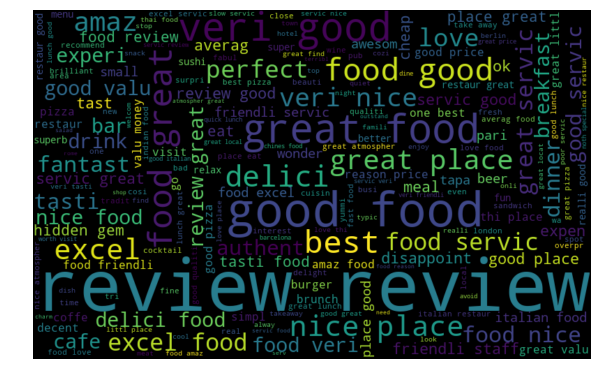

In [32]:
# ALl the stemmed words in reviews 
all_words = ' '.join([text for text in sent_data['Cleaned_Review']])    #stemmed words

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

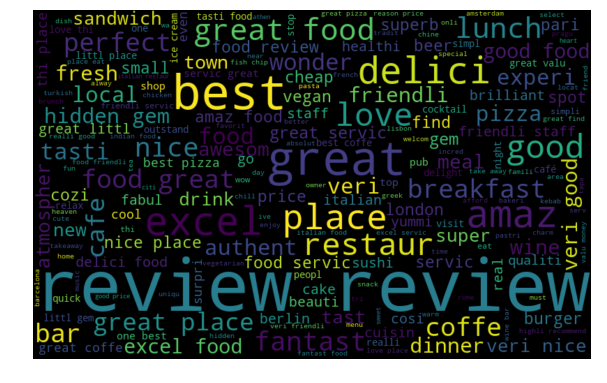

In [34]:
# Words used by the customers in reviews corresponding to rating 5
# Rating the restaurants as excellent
excellent_words = ' '.join([text for text in sent_data['Cleaned_Review'][sent_data['Rating'] == 5]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(excellent_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

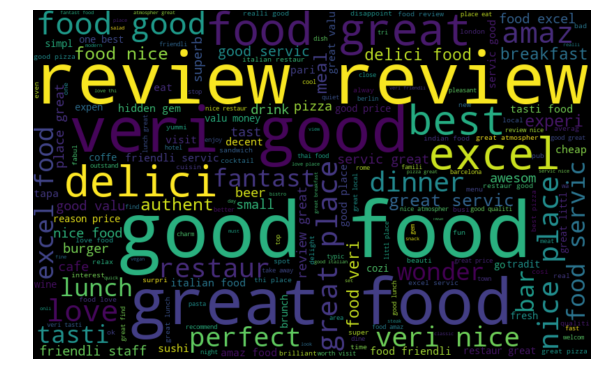

In [35]:
# Words used by the customers in reviews corresponding to rating 4
# Rating the restaurants as good
good_words = ' '.join([text for text in sent_data['Cleaned_Review'][sent_data['Rating'] == 4]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(good_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [37]:
# Words used by the customers in reviews corresponding to rating 3
# Rating the restaurants as good
good_words = ' '.join([text for text in sent_data['Cleaned_Review'][sent_data['Rating'] == 3]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(good_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

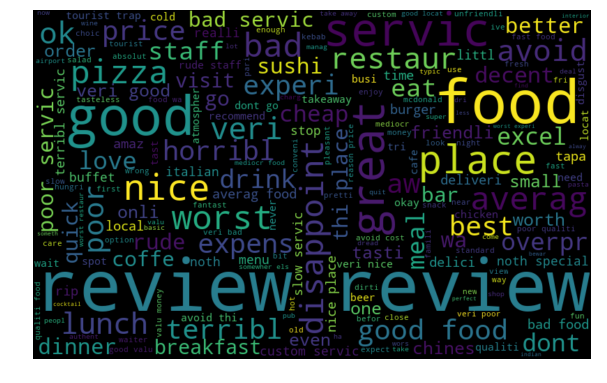

In [38]:
# Words used by the customers in reviews corresponding to rating 2
# Rating the restaurants as good
good_words = ' '.join([text for text in sent_data['Cleaned_Review'][sent_data['Rating'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(good_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
# Words used by the customers in reviews corresponding to rating 1
# Rating the restaurants as good
good_words = ' '.join([text for text in sent_data['Cleaned_Review'][sent_data['Rating'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(good_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

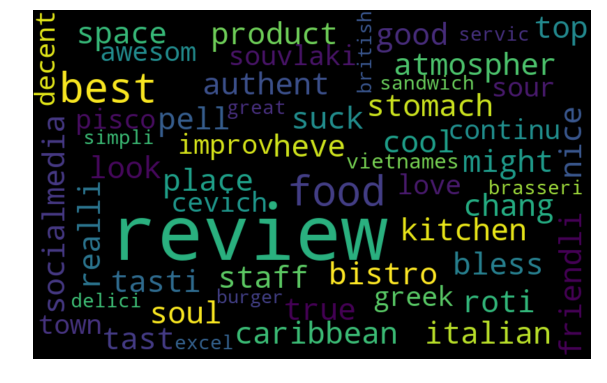

In [40]:
# Words used by the customers in reviews corresponding to rating -1
# Rating the restaurants as terrible 
terrible_words = ' '.join([text for text in sent_data['Cleaned_Review'][sent_data['Rating'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(terrible_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Sentiment Analysis using Natural Language Processing

In [41]:
sent_data.head()

Review  Rating  \
0                       Just like home       5   
1   A Warm Welcome to Wintry Amsterdam       5   
2                 Great food and staff       4   
3                         just perfect       4   
4                         Satisfaction       4   

                      Cleaned_Review  
0                     just like home  
1  a warm welcom to wintri amsterdam  
2               great food and staff  
3                       just perfect  
4                          satisfact

In [43]:
# Splitting train/test data
x = sent_data['Cleaned_Review']
Y = sent_data['Rating']

In [44]:
Y = np.array(Y)

In [45]:
for i in range(len(Y)):   # Changing the rating class -1 into 0
    Y[Y < 0] = 0

In [46]:
Y

array([5, 5, 4, ..., 3, 3, 3], dtype=int64)

#### Sentiments associated with ratings:
#### Excellent = [5]
#### Very Good = [4]
#### Good = [3]
#### Average = [2]
#### Bad = [1]
#### Terrible = [0]

In [47]:
xtrain, xtest, Y_train, Y_test = train_test_split(x, Y,   # data we want to split 
                                            train_size = 0.7,
                                            random_state = 500,       # shuffle rows
                                            stratify = Y)             # ensure classes the same in train/test

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [48]:
# Change text data into numerical for the classifer to understand.
# We will use bag of words model. To break up our Reviews sentences into words (tokens) with Count Vectorizer.

In [49]:
# We call the sklearn count Vectorizer (transformer) to transform
# Text into a vector
from sklearn.feature_extraction.text import CountVectorizer 
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 10000, stop_words = 'english') 

In [50]:
# Use vetorizer var to fit on text
# bag-of-words feature matrix
X_train = bow_vectorizer.fit_transform(xtrain.values)
X_test = bow_vectorizer.fit_transform(xtest.values)

In [51]:
X_train.toarray

<bound method _cs_matrix.toarray of <162078x6973 sparse matrix of type '<class 'numpy.int64'>'
	with 382176 stored elements in Compressed Sparse Row format>>

In [52]:
print(X_train.shape)
print(X_train.toarray())

(162078, 6973)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
print(X_test.shape)
print(X_test.toarray())

(69463, 4277)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [54]:
# Use vocabulary_ to see words in the vocabulary
vocabulary = bow_vectorizer.vocabulary_
vocabulary

{'café': 614,
 'canal': 629,
 'yummi': 4260,
 'good': 1650,
 'select': 3336,
 'lunch': 2223,
 'food': 1492,
 'dont': 1153,
 'pasta': 2737,
 'tri': 3899,
 'cosi': 909,
 'place': 2850,
 'music': 2461,
 'danc': 1008,
 'tradit': 3879,
 'worth': 4224,
 'exper': 1343,
 'best': 411,
 'stop': 3621,
 'veri': 4052,
 'nice': 2526,
 'eat': 1210,
 'staff': 3580,
 'noth': 2566,
 'special': 3543,
 'impress': 1907,
 'review': 3165,
 'alway': 143,
 'london': 2189,
 'magnific': 2246,
 'pub': 2989,
 'pizza': 2843,
 'luxuri': 2229,
 'just': 2029,
 'averag': 285,
 'cozi': 931,
 'locat': 2181,
 'thai': 3790,
 'rome': 3211,
 'big': 426,
 'portion': 2904,
 'meat': 2321,
 'dish': 1123,
 'poor': 2893,
 'servic': 3357,
 'bueno': 566,
 'lukewarm': 2220,
 'unpleas': 3986,
 'visit': 4091,
 'mr': 2443,
 'delici': 1053,
 'area': 208,
 'mix': 2393,
 'feel': 1434,
 'local': 2180,
 'great': 1684,
 'summer': 3672,
 'amaz': 146,
 'ambianc': 153,
 'hotel': 1857,
 'calm': 621,
 'stay': 3604,
 'fast': 1413,
 'tummi': 3918,
 

In [55]:
# Dimensionality reduction using Truncated Singular Value Decomposition (SVD)

from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components = 700)  
x_train = tsvd.fit_transform(X_train)
x_test = tsvd.fit_transform(X_test)

In [56]:
x_train.shape

(162078, 700)

In [57]:
x_test.shape

(69463, 700)

### Model training using keras

In [60]:
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [61]:
x_train.shape

(162078, 700)

In [140]:
# Model architecture
model = Sequential([   
    Dense(570, activation = 'relu', input_shape = (x_train[1].shape)),
    Dense(390, activation = 'relu'),
    Dense(135, activation = 'relu'),      #hidden layers
    Dense(6, activation = 'softmax')
])

In [141]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 570)               399570    
_________________________________________________________________
dense_18 (Dense)             (None, 390)               222690    
_________________________________________________________________
dense_19 (Dense)             (None, 135)               52785     
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 816       
Total params: 675,861
Trainable params: 675,861
Non-trainable params: 0
_________________________________________________________________


In [142]:
adam = keras.optimizers.adam(lr = 0.01)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = adam,
              metrics = ['accuracy'])

In [143]:
# Creating batches to increase computational speed and for better accuracy
history = model.fit(x_train, Y_train, epochs = 3, validation_split = 0.2, batch_size = 512, verbose = 1)    

Train on 129662 samples, validate on 32416 samples
Epoch 1/3
129662/129662 [==============================] - 13s 104us/step - loss: 0.9342 - acc: 0.6363 - val_loss: 0.9025 - val_acc: 0.6434
Epoch 2/3
129662/129662 [==============================] - 13s 99us/step - loss: 0.8988 - acc: 0.6441 - val_loss: 0.9078 - val_acc: 0.6439
Epoch 3/3
129662/129662 [==============================] - 13s 99us/step - loss: 0.8882 - acc: 0.6463 - val_loss: 0.9066 - val_acc: 0.6430


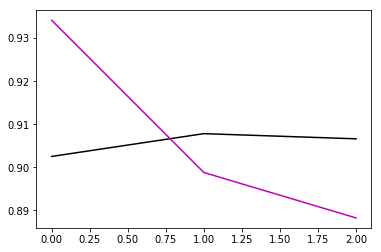

In [144]:
plt.plot(history.epoch, history.history['val_loss'], 'k',
        history.epoch, history.history['loss'],'m')

In [145]:
plt.plot(history.epoch, history.history['val_acc'],'k',
         history.epoch, history.history['acc'],'m')

In [146]:
model.evaluate(x_test, Y_test)

69463/69463 [==============================] - 7s 97us/step


[0.9927383985151534, 0.6297885205047462]

### Model training using Support Vector Machine (SVM)

In [147]:
# Train classifier model
from sklearn.svm import LinearSVC

In [148]:
#Support Vector Classification
svcModel = LinearSVC()   # Instantiate it (create an instance of an object) 

In [149]:
svcModel.fit(x_train, Y_train)   # Train/Fit model on training data

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [150]:
pred = svcModel.predict(x_test)  # Predict Ratings or Sentiment
pred

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [154]:
svcModel.score(x_train, Y_train)  

0.6449610681276916

In [151]:
svcModel.score(x_test, Y_test)  # Evaluate model on test dataset. Use the score to see how correct classifier was on test.
# We get 61.84%. Later we use TF-IDF and Logistic Regression.

0.6184299555158862

In [153]:
# Import confusion matrix and classification report 
from sklearn.metrics import confusion_matrix, classification_report

In [155]:
confusion_matrix(Y_test, pred)  

array([[    0,     0,     0,     9,     5,     0],
       [    0,     0,     0,   150,   269,     0],
       [    0,     0,     0,   505,  1594,     0],
       [    0,     0,     3,  5053, 14293,     0],
       [    0,     0,     5,  4510, 37905,     0],
       [    0,     0,     0,  1379,  3783,     0]], dtype=int64)

### Pipeline

In [156]:
# Using text processing
# Import tfidf transformer
from sklearn.feature_extraction.text import TfidfTransformer

In [157]:
# Import pipeline
from sklearn.pipeline import Pipeline

In [158]:
steps = ([
         ('tfidf', TfidfTransformer()),
          ('classifierSVC', LinearSVC())
   ])
pipeline = Pipeline(steps)

In [159]:
pipeline.fit(x_train, Y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)), ('classifierSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [160]:
# Use pipeline to predict x_test, 
predict2 = pipeline.predict(x_test)
predict2

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [161]:
pipeline.score(x_test, Y_test) 

0.6164864748139297

In [162]:
print(classification_report(predict2, Y_test))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.27      0.43      0.33     12075
          4       0.89      0.66      0.75     57388
          5       0.00      0.00      0.00         0

avg / total       0.78      0.62      0.68     69463



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Model training using Logistic Regression 

In [163]:
from sklearn.linear_model import LogisticRegression   

In [164]:
steps2 = ([
         ('tfidf', TfidfTransformer()),
          ('logreg clf', LogisticRegression()),
   ])
pipeline2 = Pipeline(steps2)

In [165]:
pipeline2.fit(x_train, Y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)), ('logreg clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [166]:
pred3 = pipeline2.predict(x_test)
pred3

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [167]:
pipeline2.score(x_train, Y_train)

0.6451585039302065

In [168]:
pipeline2.score(x_test, Y_test)   # 61% using Logistic Regression

0.6142982595050602

In [169]:
print(classification_report(pred3, Y_test)) 

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.27      0.42      0.33     12487
          4       0.88      0.66      0.75     56976
          5       0.00      0.00      0.00         0

avg / total       0.77      0.61      0.68     69463



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### The dataset is trained on different algorithms like NN using Keras, SVM and Logistic Regression. The accuarcy of all the algorithms are in the range of 60 - 65%. 
#### When it came to predicting class 4 (rating) our model performed better than the rest, as there are more samples to train on. The accuracy can be tried to increase, by splitting the ratings data into positive (4 - 5) and negative (-1 - 3), rather than having 6 different classes. 